In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import sklearn.metrics as metrics

from sklearn import svm

import numpy as np

In [ ]:
data = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')
df = pd.DataFrame(data)

In [ ]:
df=df.dropna()

In [ ]:
df_train_all = df[0:15000] 
df_test_all = df[15000:] 

df_test_all

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15000,26325,-3.140870,2.908782,-0.881833,1.138995,-1.381515,-0.083588,-1.162065,2.103742,0.164496,...,-0.011362,-0.033368,0.118559,-0.322647,0.187667,-0.219283,-0.217660,-0.099346,1.00,0.0
15001,26327,-0.614853,0.735691,0.198470,-0.019771,2.727380,3.565853,0.389681,0.871756,-1.198994,...,-0.422813,-1.577793,0.056957,0.920062,0.218562,-0.644326,0.057851,0.086704,51.00,0.0
15002,26328,-0.287682,1.368358,0.161761,2.151148,-2.508894,1.762911,5.318688,-1.974874,-0.881330,...,-0.370832,0.439046,-0.487087,0.483052,-0.271538,-0.078519,-0.660945,-1.195185,736.36,0.0
15003,26328,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0.0
15004,26331,1.160957,1.265621,-1.576473,1.472988,1.162173,-1.013532,0.658133,-0.152624,-0.847326,...,-0.120365,-0.204997,-0.203189,-0.282172,0.785278,-0.284958,0.058399,0.085436,1.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144661,86305,1.145930,0.131902,0.582682,0.509226,-0.344547,-0.312745,-0.106618,0.066582,-0.229426,...,-0.160625,-0.485816,0.172732,0.218591,0.083800,0.093498,-0.017647,0.008699,8.99,0.0
144662,86306,-1.159439,1.293311,1.665354,0.216017,0.277078,-0.097341,0.810287,0.228097,-0.393932,...,-0.044334,0.026481,-0.363068,0.091470,0.671527,-0.440231,-0.363294,-0.232516,9.99,0.0
144663,86307,0.127203,0.750928,-0.907181,-0.787828,2.098630,3.769405,-1.449344,-1.757987,-0.638194,...,-1.625143,-0.887240,0.037570,0.931982,0.892304,0.166069,-0.040906,0.134052,1.98,0.0
144664,86307,-1.256340,0.666847,0.857662,1.071812,-0.624798,0.329237,0.477858,0.502438,-0.291680,...,0.097908,0.428510,-0.175776,0.032314,-0.033240,-0.269483,0.257663,0.049923,150.57,0.0


In [ ]:

X_train = df_train_all.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train_all['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_train

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.24567382e+00,  1.66975020e-01,  4.88305743e-01, ...,
        -3.58663153e-02,  1.84945730e-02,  8.99000000e+00],
       [ 1.29727595e+00, -6.94727782e-01,  9.65736847e-01, ...,
         5.66956569e-02,  2.76745487e-02,  2.99500000e+01],
       [-9.67879121e-01,  1.03621900e+00,  1.06436838e+00, ...,
         2.08517317e-01,  3.97170733e-02,  1.09900000e+01]])

In [ ]:
X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)
X_test_all

array([[-3.14087003e+00,  2.90878213e+00, -8.81833381e-01, ...,
        -2.17660059e-01, -9.93461716e-02,  1.00000000e+00],
       [-6.14852918e-01,  7.35691395e-01,  1.98470212e-01, ...,
         5.78507668e-02,  8.67038941e-02,  5.10000000e+01],
       [-2.87681680e-01,  1.36835810e+00,  1.61760772e-01, ...,
        -6.60945347e-01, -1.19518472e+00,  7.36360000e+02],
       ...,
       [ 1.27203324e-01,  7.50928105e-01, -9.07180599e-01, ...,
        -4.09056211e-02,  1.34051671e-01,  1.98000000e+00],
       [-1.25633971e+00,  6.66846587e-01,  8.57661858e-01, ...,
         2.57662584e-01,  4.99227735e-02,  1.50570000e+02],
       [-2.08595676e+00,  2.13252671e+00,  3.94235671e-01, ...,
        -2.52739122e-01, -9.30140285e-01,  8.92000000e+00]])

In [ ]:
model = svm.SVC(kernel='linear') # Linear Kernel


In [ ]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
# np.all(np.isfinite(df_test_all))
# np.all(np.isfinite(df_test_all))
df.isnull().any()


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
predicted_values=model.predict(X_test_all)

In [ ]:
acc_svm = metrics.accuracy_score(y_test_all, predicted_values)


In [ ]:
print(acc_svm*100)

99.82493483256984


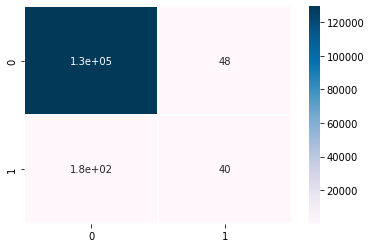

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

svm_cm = confusion_matrix(y_test_all,predicted_values) #Confusion Matrix for Predicted values
sb.heatmap(svm_cm, annot=True, linewidth=1.0,cmap='PuBu')
